### Clean the data so it has the long panel format

In [1]:
import pandas as pd

data = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/Code/merged_data.csv')

# Function to standardize and pivot income and marital status variables
def pivot_long(df, id_var, wave_prefixes, income_var_pattern, marital_status_var_pattern):
    # Initialize a list to hold the dataframes for each wave
    df_list = []
    
    # Loop over each wave prefix to pivot the data
    for i, prefix in enumerate(wave_prefixes, start=1):
        # Income and marital status variable names for this wave
        income_var = f'{prefix}_{income_var_pattern}_w{i}'
        marital_status_var = f'{prefix}_marstat'
        
        # Check if the variables exist in the dataframe
        if income_var in df.columns and marital_status_var in df.columns:
            # Select the relevant columns and rename them
            df_wave = df[[id_var, income_var, marital_status_var]].copy()
            df_wave.rename(columns={
                income_var: 'Income',
                marital_status_var: 'MaritalStatus'
            }, inplace=True)
            # Add the wave number
            df_wave['Wave'] = i
            df_list.append(df_wave)
    
    # Concatenate the dataframes
    long_df = pd.concat(df_list)
    long_df.sort_values(by=[id_var, 'Wave'], inplace=True)
    return long_df

# Define the person identifier variable and the wave prefixes
person_id_var = 'pidp'  # Replace with your actual person ID variable name
wave_prefixes = [chr(i) for i in range(97, 110)]  # 'a' to 'm'

# Standardize and pivot the dataset
long_data = pivot_long(data, person_id_var, wave_prefixes, 'prfitba', 'marstat')

# Save the long format dataset
long_data.to_csv('panel_marital_income.csv', index=False) 


### Create dummmy variable to got married and got divorced

In [3]:
import pandas as pd

long_data = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/Code/panel_marital_income.csv') 

# Filter out the rows where MaritalStatus is -9, -8, -2, or -1
filtered_data = long_data[~long_data['MaritalStatus'].isin([-9.0, -8.0, -2.0, -1.0])]

# Define the mapping of marital status codes to labels for the remaining data
marital_status_map = {
    1.0: 'single_never_married',
    2.0: 'married',
    3.0: 'registered_partnership',
    4.0: 'separated_married',
    5.0: 'divorced',
    6.0: 'widowed',
    7.0: 'separated_civil_partner',
    8.0: 'ex_civil_partner',
    9.0: 'surviving_civil_partner'
}

# Replace MaritalStatus numeric codes with labels
filtered_data['MaritalStatus'] = filtered_data['MaritalStatus'].map(marital_status_map)

# Generate dummy variables for MaritalStatus
marital_status_dummies = pd.get_dummies(filtered_data['MaritalStatus'], prefix='MaritalStatus')

# Combine the original dataframe with the new dummy variables
filtered_data_with_dummies = pd.concat([filtered_data, marital_status_dummies], axis=1)

# Save the filtered dataframe with dummy variables
filtered_data_with_dummies.to_csv('filtered_dataset_with_dummies.csv', index=False)  # Replace with your desired file path


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_14289/2615285621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['MaritalStatus'] = filtered_data['MaritalStatus'].map(marital_status_map)


In [5]:
import pandas as pd

# Load the dataset which is already in long format
long_data = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/Code/filtered_dataset_with_dummies.csv')  # Replace with the actual file path

# Define the mapping of income codes to labels
income_labels_map = {
    0.0: 'no_income',
    1.0: 'less_than_1299',
    2.0: '1300_to_2099',
    3.0: '2100_to_3099',
    4.0: '3100_to_4199',
    5.0: '4200_to_5199',
    6.0: '5200_to_6499',
    7.0: '6500_to_7799',
    8.0: '7800_to_9299',
    9.0: '9300_to_10999',
    10.0: '11000_to_13499',
    11.0: '13500_to_15999',
    12.0: '16000_to_19999',
    13.0: '20000_to_24999',
    14.0: '25000_or_more'
}

# Filter out the rows where Income is -9, -8, -2, or -1
filtered_data = long_data[~long_data['Income'].isin([-9.0, -8.0, -2.0, -1.0])]

# Replace Income numeric codes with labels (if needed)
filtered_data['Income_Label'] = filtered_data['Income'].map(income_labels_map)

# Calculate the change in income between each wave for each individual
filtered_data['Income_Change'] = filtered_data.groupby('pidp')['Income'].diff()

# Proceed with the creation of marital status change dummy variables as per previous instructions

# Save the filtered and updated dataframe
filtered_data.to_csv('filtered_dataset_with_income_changes.csv', index=False)  # Replace with your desired file path


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_14289/1380698037.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Income_Label'] = filtered_data['Income'].map(income_labels_map)
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_14289/1380698037.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Income_Change'] = filtered_data.groupby('pidp')['Income'].diff()


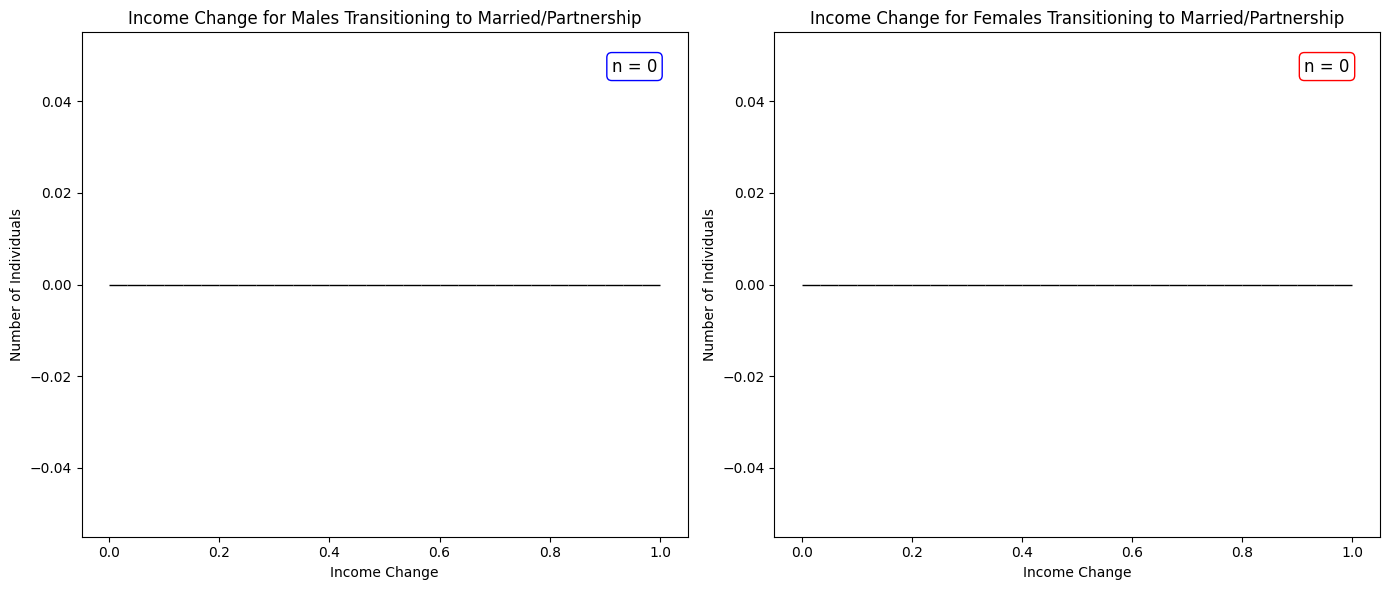

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/Code/panel_marital_income_change_dummy.csv')

# Replace with actual column names from your dataset
single_status_column = 'MaritalStatus_single_never_married'
married_status_column = 'MaritalStatus_married'
partnership_status_column = 'MaritalStatus_registered_partnership'
sex_column = 'Sex' 
income_change_column = 'Income_Change'

# Filter the dataset for individuals who transitioned from single to married or in a registered partnership
# Update the conditions based on how your dataset indicates these transitions
transitioned_to_married_or_partnership = (data[single_status_column] == 1) & ((data[married_status_column] == 1) | (data[partnership_status_column] == 1))
filtered_data = data[transitioned_to_married_or_partnership]

# Separating the filtered data by sex
male_df = filtered_data[(filtered_data[sex_column] == 1) & filtered_data[income_change_column].notna()]
female_df = filtered_data[(filtered_data[sex_column] == 2) & filtered_data[income_change_column].notna()]

# Calculate the sample sizes for males and females
n_male = len(male_df)
n_female = len(female_df)

# Plotting the histograms for income change
plt.figure(figsize=(14, 6))

# Histogram for males
plt.subplot(1, 2, 1)
plt.hist(male_df[income_change_column], bins=30, color='blue', edgecolor='black')
plt.title('Income Change for Males Transitioning to Married/Partnership')
plt.xlabel('Income Change')
plt.ylabel('Number of Individuals')
plt.text(0.95, 0.95, f'n = {n_male}', transform=plt.gca().transAxes, horizontalalignment='right', verticalalignment='top', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='white'))

# Histogram for females
plt.subplot(1, 2, 2)
plt.hist(female_df[income_change_column], bins=30, color='red', edgecolor='black')
plt.title('Income Change for Females Transitioning to Married/Partnership')
plt.xlabel('Income Change')
plt.ylabel('Number of Individuals')
plt.text(0.95, 0.95, f'n = {n_female}', transform=plt.gca().transAxes, horizontalalignment='right', verticalalignment='top', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white'))

plt.tight_layout()
plt.show()
